# Model One: DenseNet
1.5% buy and sell

In [1]:
import torch
from torchvision.models import *
from fastai.vision import *

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import gc

In [3]:
# Getting our paths 
images_path = f'{os.curdir}/model_data/images_unscattered'
labels_path = f'{os.curdir}/model_data/unscattered.csv'
path = f'{os.curdir}/model_data'

## Unscattered w/ Data Augmentation

In [4]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.2, max_lighting=0.1, max_warp=0.0)

# Creating source object
seed = np.random.seed(42)
src = (ImageItemList.from_csv(path, csv_name='unscattered.csv', folder='images_unscattered', suffix='.png')
                     .random_split_by_pct(0.2, seed)
                     .label_from_df())

# Creating data object function - returns data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    
    return data

In [5]:
data = get_data((200,300), 8)
# data = get_data((400, 600), 4)

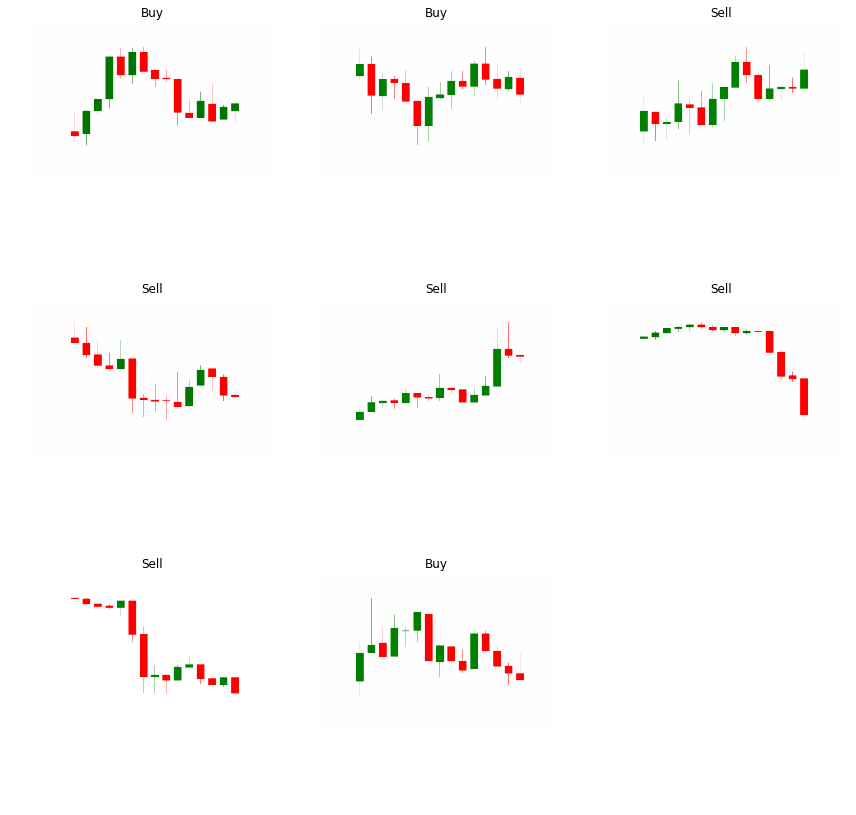

In [6]:
data.show_batch()

In [8]:
gc.collect()

0

In [9]:
# Test Architecture
arch = densenet169

# Creating our learner - PRETRAINED on imagenet
learn = create_cnn(data, arch, metrics=[accuracy])

/opt/conda/envs/fastai/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


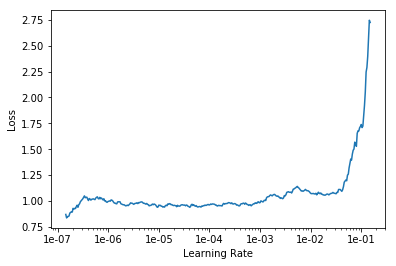

In [10]:
# Finding learning rate
learn.lr_find(num_it=500)
learn.recorder.plot()

In [11]:
lr = 5e-4

In [12]:
# Test one
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy
1,0.861470,0.747318,0.536940
2,0.738411,0.729176,0.543339
3,0.648568,0.694077,0.560209
4,0.620466,0.676242,0.582897
5,0.582090,0.675060,0.579988


In [20]:
interp = ClassificationInterpretation.from_learner(learn)

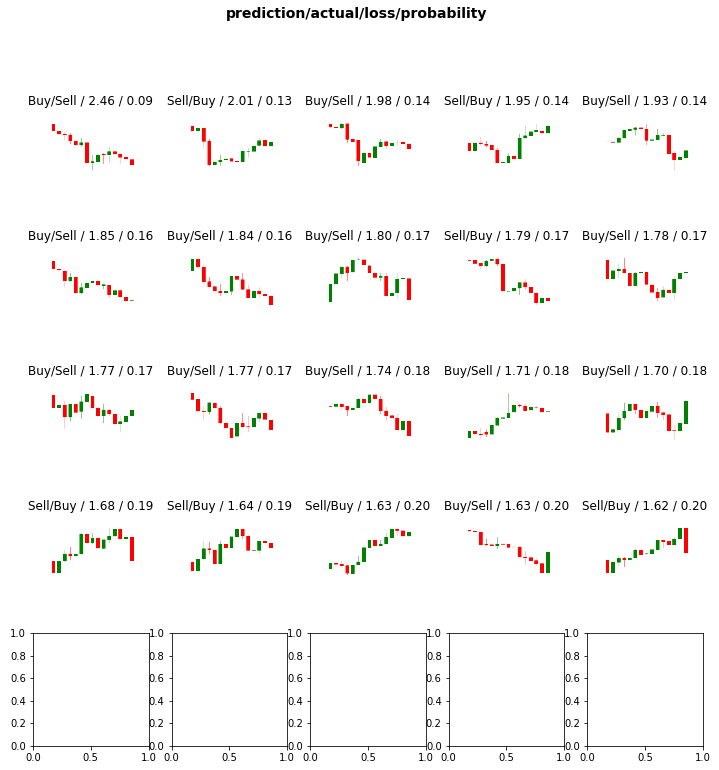

In [14]:
interp.plot_top_losses(20)

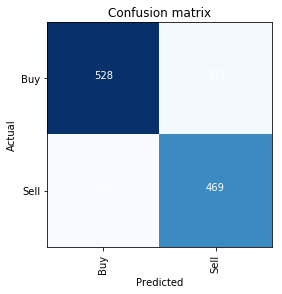

In [15]:
interp.plot_confusion_matrix()

In [2]:
360 / 528

0.6818181818181818

In [16]:
interp.most_confused()

[('Buy', 'Sell', 362), ('Sell', 'Buy', 360)]

In [22]:
362 + 360 + 528 + 469

1719

In [23]:
(360 + 362) / 1719

0.4200116346713205

In [24]:
100 - 42

58

In [17]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (6876 items)
[Category Buy, Category Buy, Category Buy, Category Buy, Category Buy]...
Path: model_data
x: ImageItemList (6876 items)
[Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600)]...
Path: model_data;

Valid: LabelList
y: CategoryList (1719 items)
[Category Buy, Category Sell, Category Sell, Category Sell, Category Buy]...
Path: model_data
x: ImageItemList (1719 items)
[Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600), Image (3, 400, 600)]...
Path: model_data;

Test: None